# remaping from a netCDF file to shapefile

### In order to map the netcdf into boundaries of a shapefile we should follow the follwoing steps

# Step 1 preparing the target shapefile
### Target shapefile is basin or catchment areas that we intend to have a remap of varibales for that.
### we read a shapefile and prepare the filed names that are needed for candex to operate.


      COMID    unitarea  flag  \
0  71032440  107.012467     0   
1  71032422   50.929339     0   
2  71032409   65.791372     0   
3  71032292   25.591308     0   
4  71032217   56.835431     0   

                                            geometry  
0  POLYGON ((-116.47042 51.73542, -116.46708 51.7...  
1  POLYGON ((-116.34125 51.71542, -116.34042 51.7...  
2  MULTIPOLYGON (((-116.25208 51.71042, -116.2429...  
3  POLYGON ((-116.07792 51.65458, -116.07458 51.6...  
4  POLYGON ((-116.23708 51.65208, -116.23458 51.6...  
Index(['COMID', 'unitarea', 'flag', 'geometry'], dtype='object')


Text(99.36589273042097, 0.5, 'Lat')

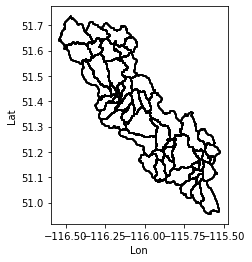

In [10]:
# cell 1: load the shapefile, check the filed or create the necessaary fields
import geopandas as gpd
import matplotlib.pyplot as plt

# target shapefile is what we want the varibales to be remapped to
shp = gpd.read_file('../data/target_shp/Bow.shp') 
print(shp.head()) # show the first five row of the shapefile
print(shp.columns) # print existing fields in the shapefile

# plotting
shp.geometry.boundary.plot(color=None,edgecolor='k',linewidth = 2)
plt.xlabel('Lon')
plt.ylabel('Lat')

In [2]:
# cell 2: prepare the needed fields; renaming adding centeroid lat and lon values
shp = shp.rename (columns={'COMID':'ID_t'}); # change the COMID to "ID_t" ID from target
shp['lat_t'] = shp.centroid.y # lat from target
shp['lon_t'] = shp.centroid.x # lon from target
print(shp.head()) # show the first 5 rows of the shapefile after renaming and adding centroid
shp.to_file('../data/target_shp/Bow_standard.shp') # save the file as a standard format

       ID_t    unitarea  flag  \
0  71032440  107.012467     0   
1  71032422   50.929339     0   
2  71032409   65.791372     0   
3  71032292   25.591308     0   
4  71032217   56.835431     0   

                                            geometry      lat_t       lon_t  
0  POLYGON ((-116.47042 51.73542, -116.46708 51.7...  51.665703 -116.444195  
1  POLYGON ((-116.34125 51.71542, -116.34042 51.7...  51.670710 -116.304323  
2  MULTIPOLYGON (((-116.25208 51.71042, -116.2429...  51.661669 -116.176104  
3  POLYGON ((-116.07792 51.65458, -116.07458 51.6...  51.625792 -116.088587  
4  POLYGON ((-116.23708 51.65208, -116.23458 51.6...  51.597677 -116.224405  


<ipython-input-2-d5cc5f574b3c>:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  shp['lat_t'] = shp.centroid.y # lat from target
<ipython-input-2-d5cc5f574b3c>:4: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  shp['lon_t'] = shp.centroid.x # lon from target


# Step 2, preparing the shapefile from nc file(s)
### netxt step is to prepared the shapefile from coordinated (lat/lon) in shapefiles
### the code suports three cases:
###    1- the source netcdf file is in regular lat/lon (this example)
###    2- the source netcdf file has rotated lat/lon meaning that each point has it own lat/lon
###    3- the course netcdf file is irregular and comes with a netcdf file that holds the geopstila information of the netCDF values
### in this example we have a netCDF in regular lat/lon form to subbasin. The netCDF files are saved in daily fashion for 3 days (the first three days of january 1979).
### Assuming the location and extend of all the netcdf files similar we assume that the first shapefile applies to the other netcdf files as well
### candex support simple change from cordination of 0-360 to -180-180 for convinece. However this functionality wont work in areas near lon of 0 where 0 and 360 comes toegtehr.

In [3]:
# cell 3: read one sample of nc file
from candex import *

In [4]:
# cell 4: specifiying the parameter for creating the source shapefile
name_of_nc = '../data/source_nc/ERA5_NA_19790101.nc' # name of the sample nc file (give only one if there are separaete file for each year or month)
name_of_variable = 'airtemp' # sample varibale from nc file (similar to all the dimensions for all the varibales with intend to read)
name_of_lon_var = 'longitude' # name of varibale in nc file (and not dimension) that holed the longituge values
name_of_lat_var = 'latitude' # name of varibale in nc file (and not dimension) that holds the latitiute values
box_values =  np.array([50,52,-118,-115]) # or False# # bounding box the trim the created shepefile
correct_360 = False # if the nc file is 0 to 360 and want to transfor to -180 to 180 (in the case the box_value should be in either of east or west hemisphere)
name_of_shp = '../data/source_shp/Era5_NA.shp' # name of the shapefile that is created and saved

# creating the shapefile and preparing the 2D lat/lon field based on shapefile for indexing
lat_2D, lon_2D = NetCDF_SHP_lat_lon(name_of_nc, name_of_variable, name_of_lat_var,
                                            name_of_lon_var, name_of_shp, box_values, correct_360)

case 1 - regular lat/lon


   ID_s  lat_s   lon_s                                           geometry
0   1.0  51.75 -117.75  POLYGON ((-117.87500 51.75000, -117.87500 51.8...
1   2.0  51.50 -117.75  POLYGON ((-117.87500 51.50000, -117.87500 51.6...
2   3.0  51.25 -117.75  POLYGON ((-117.87500 51.25000, -117.87500 51.3...
3   4.0  51.00 -117.75  POLYGON ((-117.87500 51.00000, -117.87500 51.1...
4   5.0  50.75 -117.75  POLYGON ((-117.87500 50.75000, -117.87500 50.8...


Text(14.25, 0.5, 'Lat')

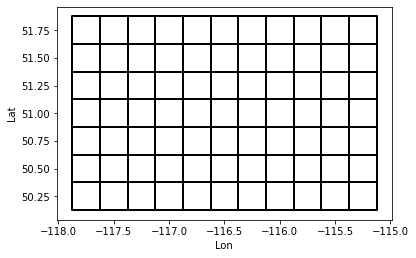

In [5]:
# cell 5: drawing the created shapefile
shp_source = gpd.read_file('../data/source_shp/Era5_NA.shp') # load it
print(shp_source.head()) # show the first 5 rows
# plotting
shp_source.geometry.boundary.plot(color=None,edgecolor='k',linewidth = 2)
plt.xlabel('Lon')
plt.ylabel('Lat')

# Step 3 intersection of the source and target shapefile and creation of remap data frame
### In this section we intersect the two shapefile (source and target) to find the percent contribution of source in the target
### we rename the targets to the standard name that it used for candex functions

In [6]:
# cell 6: intersecting the target and source shapefile
from candex import *

shp_target = gpd.read_file('../data/target_shp/Bow_standard.shp') # save the file as a standard format
shp_source = gpd.read_file('../data/source_shp/Era5_NA.shp') # save the file as a standard format

# assign coordination (here both are defined as WGS1984)
shp_target = shp_target.set_crs("EPSG:4326") # in case is missing
shp_source = shp_source.set_crs("EPSG:4326") # in case if missing

# intersection
shp_int = intersection_shp (shp_target, shp_source)

# rename dictionary
dict_rename = {'S_1_ID_t' : 'ID_t',
               'S_1_lat_t': 'lat_t',
               'S_1_lon_t': 'lon_t',
               'S_2_ID_s' : 'ID_s',
               'S_2_lat_s': 'lat_s',
               'S_2_lon_s': 'lon_s',
               'AP1N'     : 'weight'}

shp_int = shp_int.rename(columns=dict_rename) # rename fields
shp_int = shp_int.sort_values(by=['ID_t']) # sort based on ID_t
shp_int.to_file('../data/intersection_shp/Bow_Era5_NA.shp') # save files

/Users/shg096/Desktop/candex_newgen/candex/candex.py:242: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  shp_1['AS1'] = shp_1.area
/Users/shg096/Desktop/candex_newgen/candex/candex.py:246: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  shp_2['AS2'] = shp_2.area
/Users/shg096/Desktop/candex_newgen/candex/candex.py:327: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  pairs = gpd.GeoDataFrame(nei, columns=['idx1','idx2'], crs=df1.crs)
/Users/shg096/Desktop/candex_newgen/candex/candex.py:331: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  pairs = gpd.Ge

In [7]:
# cell 7: indexing of the source lat/lon to row and colomns in nc file
remap_df = Dbf5('../data/intersection_shp/Bow_Era5_NA.dbf') # to intersection cat and ERA5
remap_df = remap_df.to_dataframe()

#
rows, cols = lat_lon_to_index(np.array(remap_df['lat_s']),
                              np.array(remap_df['lon_s']),
                              lat_2D,
                              lon_2D)
remap_df['rows'] = rows
remap_df['cols'] = cols

# save remap_df as csv for future use
remap_df.to_csv('../data/remap/remap.csv')

# Step 4 resample nc file(s)
### does the remap and write the nc file for each procided source nc file.
### the time, calendar, time units, varibales units are carried to the remapped nc file from source.

In [8]:
# loading the remap csv
remap_df = pd.read_csv('../data/remap/remap.csv')

# listing the nc files
nc_names = '../data/source_nc/ERA5_NA_197901*.nc' # if there are multiple nc file can be pecify by *
output_path = '../data/target_nc/remapped_' # the path and the inital part of the remapped nc files
name_of_var_time = 'time' # dimension of time in the source nc files
name_of_vars = ['airtemp','pptrate'] #varibale that need to be remapped
# format of the varibales
format_of_vars = ['f4','f4'] # type of the varibale that need to be remapped f4 single, f8 double, int, integer
fill_values = ['-9999.00','-9999.00'] # Fill values for each varibale
authour_name = 'Shervan Gharari, Computational Hydrology Team, The University of Saskatchewan' # the authour


target_nc_creation(nc_names,
                   remap_df,
                   name_of_var_time,
                   output_path,
                   name_of_vars,
                   format_of_vars,
                   fill_values,
                   authour_name)


Remapping ../data/source_nc/ERA5_NA_19790101.nc to ../data/target_nc/remapped_1979-01-01-00-00-00.nc
Started at date and time 2020-11-29 19:38:25.585165
Ended   at date and time 2020-11-29 19:38:25.804869
Remapping ../data/source_nc/ERA5_NA_19790102.nc to ../data/target_nc/remapped_1979-01-02-00-00-00.nc
Started at date and time 2020-11-29 19:38:25.809210
Ended   at date and time 2020-11-29 19:38:25.997250
Remapping ../data/source_nc/ERA5_NA_19790103.nc to ../data/target_nc/remapped_1979-01-03-00-00-00.nc
Started at date and time 2020-11-29 19:38:26.001333
Ended   at date and time 2020-11-29 19:38:26.224305
